
Simulated Population Data:


,disease:,no disease:,total:
exposed:,207,489,696
nonexposed:,245,1572,1817
total:,452,2061,2513




True Odds Ratio: 2.716113684737699



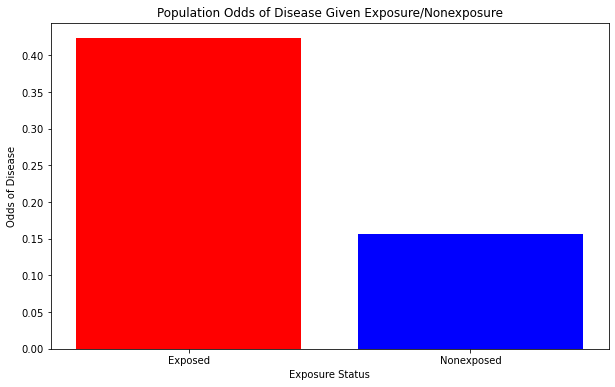

,exposed_disease,exposed_no_disease,nonexposed_disease,nonexposed_no_disease,sample_size,odds_ratio,log_odds_ratio,var_log_odds_ratio,ub_ci_log_odds_ratio,lb_ci_log_odds_ratio,weight
study number:,,,,,,,,,,,
0,31.0,60.0,25.0,182.0,298.0,3.761333,1.324774,0.094419,1.927037,0.722510,10.591062
1,32.0,68.0,42.0,199.0,341.0,2.229692,0.801863,0.074791,1.337881,0.265845,13.370676
2,59.0,147.0,77.0,503.0,786.0,2.621875,0.963890,0.038727,1.349601,0.578178,25.821806
3,48.0,104.0,63.0,367.0,582.0,2.688645,0.989037,0.049047,1.423108,0.554967,20.388802
4,42.0,73.0,49.0,312.0,476.0,3.663405,1.298393,0.061121,1.782959,0.813827,16.360870
5,23.0,41.0,21.0,89.0,174.0,2.377468,0.866036,0.126724,1.563762,0.168310,7.891196
6,52.0,113.0,54.0,405.0,624.0,3.451327,1.238759,0.049068,1.672924,0.804594,20.379889
7,38.0,89.0,51.0,265.0,443.0,2.218550,0.796854,0.060933,1.280673,0.313035,16.411422
8,50.0,107.0,63.0,365.0,585.0,2.707313,0.995957,0.047959,1.425186,0.566728,20.851345


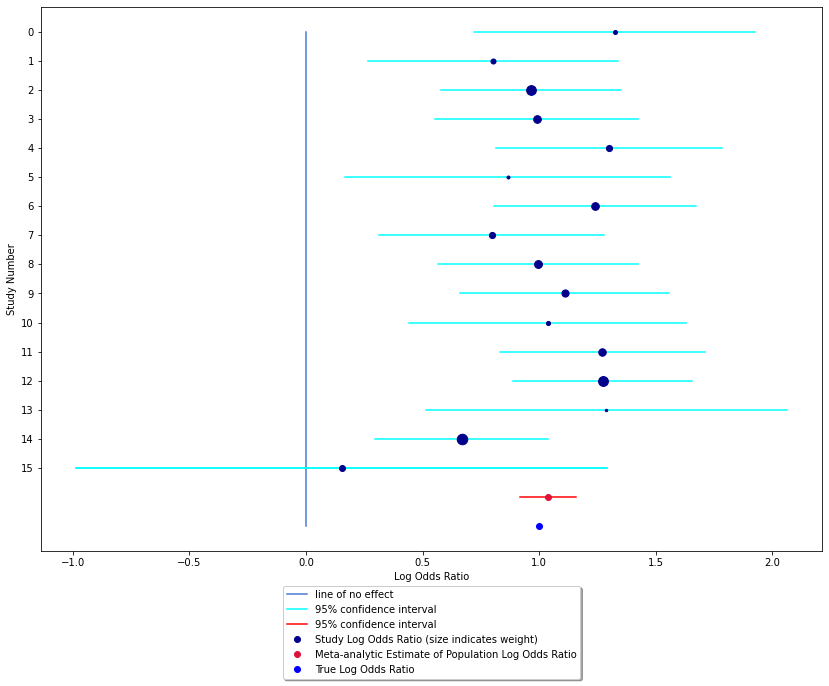

Z statistic of summary effect estimate =  16.902823406934367
p <  0.001


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

plt.style.use('seaborn-muted')

# simulating a population, with a proportion of the population exposed to a hazard

population = np.array([])

population_size = np.random.randint(1000,8000)

p_exposed = np.random.uniform(high =0.3)

exposure_danger = np.random.uniform(low =0.2, high = 0.4)

disease_general = np.random.uniform(high = exposure_danger)

# probabilistically assigning a disease status to each member of the population, where the probability of having the 
# disease changes conditionally on exposure status
for i in np.arange(population_size):
    exposed_or_not = np.random.choice(['exposed','nonexposed'], p = [p_exposed, 1-p_exposed])
    if exposed_or_not == 'exposed':
        population = np.append(population, np.random.choice(['exposed_disease','exposed_no_disease'], 
                                           p=[exposure_danger,1-exposure_danger]))
    if exposed_or_not == 'nonexposed':
        population = np.append(population, np.random.choice(['nonexposed_disease','nonexposed_no_disease'],
                          p=[disease_general,1-disease_general]))

    
# creating counts based on exposure and disease status
population_n = len(population)

nonexposed_no_disease = np.count_nonzero(population == 'nonexposed_no_disease')

nonexposed_disease = np.count_nonzero(population == 'nonexposed_disease')

number_nonexposed = nonexposed_no_disease + nonexposed_disease

exposed_no_disease = np.count_nonzero(population == 'exposed_no_disease')

exposed_disease = np.count_nonzero(population == 'exposed_disease')

number_exposed = exposed_no_disease + exposed_disease

total_disease = nonexposed_disease + exposed_disease

df_pop = pd.DataFrame(index = ['exposed:','nonexposed:', 'total:'], columns = ['disease:','no disease:', 'total:'])


df_pop.iloc[0,0] = exposed_disease
df_pop.iloc[0,1] = exposed_no_disease
df_pop.iloc[0,2]  = exposed_disease + exposed_no_disease
df_pop.iloc[1,0] = nonexposed_disease
df_pop.iloc[1,1] = nonexposed_no_disease
df_pop.iloc[1,2] = nonexposed_disease + nonexposed_no_disease
df_pop.iloc[2,0] = exposed_disease + nonexposed_disease
df_pop.iloc[2,1] = exposed_no_disease + nonexposed_no_disease 
df_pop.iloc[2,2] = population_n

# correcting 0 counts (if there are any) so the odds ratio is defined
if df_pop.iloc[0,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[0,1] == 0:
    df_pop.iloc[0,0] == 0.5

if df_pop.iloc[1,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[1,1] == 0:
    df_pop.iloc[0,0] == 0.5

print('\nSimulated Population Data:')
display(df_pop)
print()


# calculating the population effect size

odds_disease_giv_exposure = exposed_disease/exposed_no_disease

odds_disease_giv_nonexposure = nonexposed_disease/nonexposed_no_disease

true_odds_ratio = odds_disease_giv_exposure/odds_disease_giv_nonexposure

true_log_odds_ratio = np.log(true_odds_ratio)

    
print()
print('True Odds Ratio:', true_odds_ratio)
print()

# plotting the population of odds of disease given exposure status
plt.figure(figsize = (10,6))
plt.bar(x = ['Exposed', 'Nonexposed'], height = [odds_disease_giv_exposure, odds_disease_giv_nonexposure]
       , color = ['red', 'blue'])
plt.xlabel('Exposure Status')
plt.ylabel('Odds of Disease')
plt.title('Population Odds of Disease Given Exposure/Nonexposure')
plt.show()

# simulating studies for an inverse-variance fixed effect meta-analysis

no_of_studies = np.random.randint(5,40)

studies = []

for i in np.arange(no_of_studies):
    sample_size = np.random.randint(10,800)
    study = np.random.choice(population, size = sample_size, replace = False)
    studies.append(study)
    
counts = np.array([])


# creating a dataframe for the study counts

df = pd.DataFrame(columns = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease'])

# creating counts for disease status and exposure status within each study

for i in studies:
    temp_exposed_disease = np.count_nonzero(i == 'exposed_disease')
    temp_exposed_no_disease = np.count_nonzero(i == 'exposed_no_disease')
    temp_nonexposed_disease = np.count_nonzero(i == 'nonexposed_disease')
    temp_nonexposed_no_disease = np.count_nonzero(i == 'nonexposed_no_disease')
    study = [temp_exposed_disease,temp_exposed_no_disease,temp_nonexposed_disease,temp_nonexposed_no_disease]
    
    for i in np.arange(len(study)):
        if study[i] == 0:
            study[i] = 0.5
   
    df = df.append(pd.Series(study, index = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease']), ignore_index = True)
    

df['sample_size']= df['exposed_disease'] + df['exposed_no_disease']+ df['nonexposed_disease'] + df['nonexposed_no_disease']
    
df.index.name = 'study number:'


# calculating the odds ratio for each simulated study

df['odds_ratio'] = (df['exposed_disease']/df['exposed_no_disease'])/(df['nonexposed_disease']/df['nonexposed_no_disease'])

# ensuring all datatypes are float
for i in df.columns:
    df[i] = df[i].astype('float')
    
# calculating the log odds ratio for each simulated study
df['log_odds_ratio']= np.log(df['odds_ratio'])


    
# calculating the variance, standard error and 95% confidence intervals of the log odds ratio for each study

SE_log_odds_ratio = np.array([])
var_log_odds_ratio = np.array([])


var_log_odds_ratio = 1/df['exposed_disease'] + 1/df['exposed_no_disease'] + 1/df['nonexposed_disease'] + 1/df['nonexposed_no_disease'] 
SE_log_odds_ratio =  np.sqrt(var_log_odds_ratio)                        


df['var_log_odds_ratio'] = var_log_odds_ratio
df['ub_ci_log_odds_ratio'] = df['log_odds_ratio'] + 1.96 * SE_log_odds_ratio
df['lb_ci_log_odds_ratio'] = df['log_odds_ratio'] - 1.96 * SE_log_odds_ratio
df['weight'] = 1/var_log_odds_ratio
 
    
display(df)

# creating a forest plot of odds ratios

y = []
zeros = []
for i in np.arange(len(df.index)+2):
    y.append(i)
    zeros.append(0)
    
study_list = list(df.index)


plt.figure(figsize = (14,10))   
plt.plot(zeros,y, label = 'line of no effect')
plt.xlabel('Log Odds Ratio')
plt.ylabel('Study Number')

plt.yticks(study_list)
plt.gca().invert_yaxis()

# plotting the confidence intervals

for i in np.arange(len(df)):
    xs = np.linspace(df['lb_ci_log_odds_ratio'].iloc[i],df['ub_ci_log_odds_ratio'].iloc[i])
    ys = []
    for x in xs:
        ys.append(study_list[i])
    plt.plot(xs, ys, color = 'cyan')
 
 
    
plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')


# creating weights to scale the points on the plot by the weight the study is given in the meta-analysis
stndrd_weights = df['weight']/np.sum(df['weight']) * 100
    
# plotting the study effect sizes
for i in np.arange(len(df)):
    plt.plot(df['log_odds_ratio'].iloc[i], i, 'o', color = 'darkblue', markersize = stndrd_weights[i])
  
    
# calculating the fixed effect meta-analysis statistics

effect_sizes = df['log_odds_ratio'].copy()
weights = df['weight'].copy()
sum_of_weights = np.sum(weights)

effect_size_times_weight = effect_sizes * weights

sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean    

# calculating a 95% confidence interval for the summary effect
ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)
    
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(df['log_odds_ratio'].iloc[len(df['log_odds_ratio'])-1], len(df['log_odds_ratio'])-1, 'o', color = 'darkblue', label = 'Study Log Odds Ratio (size indicates weight)')
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Log Odds Ratio')

plt.plot(true_log_odds_ratio,max(df.index)+2, 'o', color = 'blue', label = 'True Log Odds Ratio')


import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()


# calculating the significance of the summary effect size
z = weighted_mean/se_weighted_mean
p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))

if p == 0:
    p = 0.001
    print('Z statistic of summary effect estimate = ', z)
    print('p < ', p)
else:
    print('Z statistic of summary effect estimate = ', z)
    print('p = ', p)